# Regressão Linear

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_excel(r"C:\Users\gilso\Documents\FACULDADE\Eng de Software\1° ano\PROJETOS\SIJIA\challenger-SijiA\SPRINT_MATEMÁTICA\dados_geral.xlsx")
df

,Quiz,Acertos,Erros,Acertos(%),Média tempo resposta(s),Duração do quiz(min),Status
0,Exame - Hemograma,4,6,40,25.9,4.316667,REPROVADO
1,Exame - Hemograma,7,3,70,28.9,4.816667,REPROVADO
2,Exame - Hemograma,2,8,20,30.0,5.000000,REPROVADO
3,Exame - Hemograma,5,5,50,31.9,5.316667,REPROVADO
4,Exame - Hemograma,4,6,40,27.9,4.650000,REPROVADO
...,...,...,...,...,...,...,...
395,Exame - Hemograma,8,2,80,19.3,3.216667,APROVADO
396,Exame - Hemograma,10,0,100,19.4,3.233333,APROVADO
397,Exame - Hemograma,9,1,90,19.9,3.316667,APROVADO
398,Exame - Hemograma,9,1,90,17.2,2.866667,APROVADO


In [39]:
df.shape

(400, 7)

In [40]:
df.dtypes

Quiz                        object
Acertos                      int64
Erros                        int64
Acertos(%)                   int64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

In [41]:
df = df.astype({"Acertos(%)": float})
df = df.astype({"Acertos": float})
df = df.astype({"Erros": float})

In [42]:
df.dtypes

Quiz                        object
Acertos                    float64
Erros                      float64
Acertos(%)                 float64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

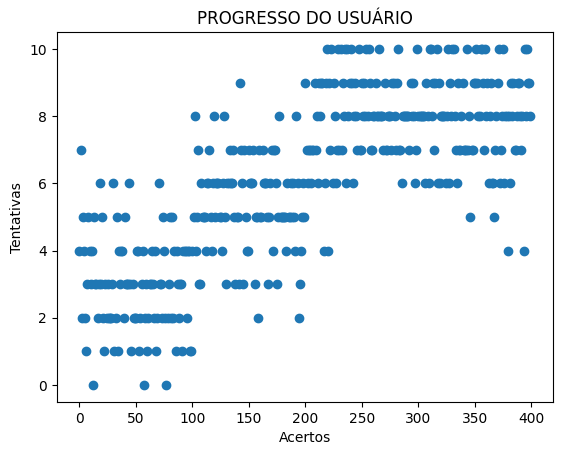

In [43]:
tentativas = range(len(df))
acertos = df['Acertos']
duracao = df['Média tempo resposta(s)']

plt.scatter(tentativas, acertos)
plt.title('PROGRESSO DO USUÁRIO')
plt.xlabel('Acertos')
plt.ylabel('Tentativas')
plt.show()

In [44]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [45]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [46]:
# Criação do modelo
#               eixo    y            x
regressao = smf.ols('tentativas ~ acertos', data = df).fit()

In [47]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             tentativas   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     532.7
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.03e-75
Time:                        15:48:42   Log-Likelihood:                -2297.3
No. Observations:                 400   AIC:                             4599.
Df Residuals:                     398   BIC:                             4607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9474      9.913     -1.205      0.2

In [48]:
regressao.params

Intercept   -11.947379
acertos      34.949980
dtype: float64

C:\Users\gilso\AppData\Local\Temp\ipykernel_45412\3170914987.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


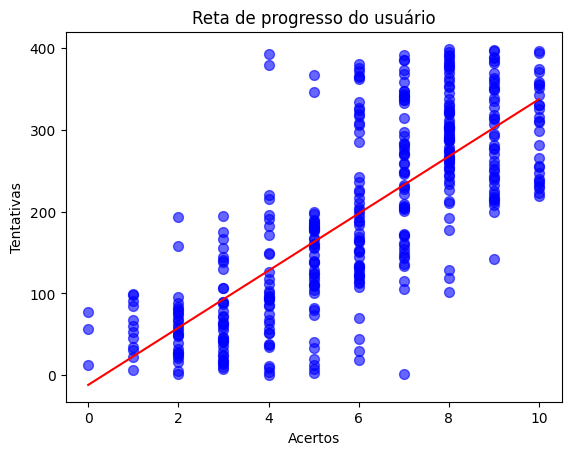

In [49]:
plt.scatter(y=tentativas, x=acertos, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 10)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de progresso do usuário')
plt.ylabel('Tentativas')
plt.xlabel('Acertos')
plt.show()

# Regressão Polinomial

In [50]:
modelo2 = np.poly1d(np.polyfit(acertos, tentativas, 2))

In [ ]:
y2 = modelo2(acertos)
y2

In [52]:
modelo2.coef

array([ -0.2110251 ,  37.33357567, -17.32570711])

In [53]:
print("Equação: tentativa = {:.1f}*acertos^2 + {:.1f}*acertos + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: tentativa = -0.2*acertos^2 + 37.3*acertos + -17.3


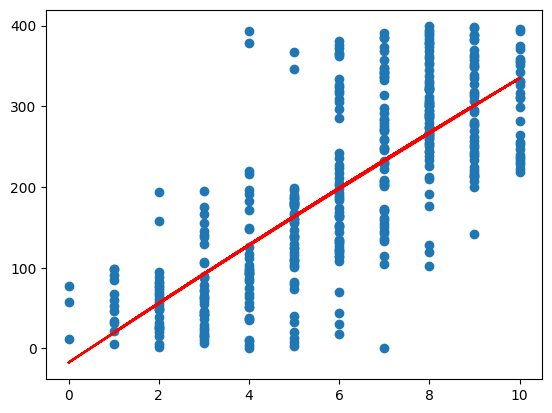

In [54]:
plt.scatter(acertos, tentativas)
plt.plot(acertos,y2,color='red')